In [8]:
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from collections import Counter

print('Loaded Libraries')

Loaded Libraries


In [6]:
train_data = pd.read_csv("cleaned_data.csv", encoding = "ISO-8859-1")

train_data.drop('nkill', 1, inplace=True)   
train_data.drop('nwound', 1, inplace=True)
train_data.drop('propvalue', 1, inplace=True)
train_data.drop('iyear', 1, inplace=True)

train_data.head()

,Success,# of Perps,Suicide,total_num_hurt_killed,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,...,Catastrophic Damage (greater 1B USD),Major Damage (greater 1M USD but less 1B USD),Minor Damage (less 1M USD),Chemical,Explosives/Bombs/Dynamite,Firearms,Incendiary,Melee,Sabotage Equipment,Vehicle
0,1,200,0,4,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,1,0,39,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,4,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split into training and validation sets
train, validation = train_test_split(train_data, 
                                        shuffle = True,
                                        test_size=0.4,
                                        random_state=42
                                        )


validation, test = train_test_split(validation, 
                                        shuffle = True,
                                        test_size=0.5,
                                        random_state=42
                                        )



# Split data into input and outputs
X_train = train.loc[:, train.columns != 'total_num_hurt_killed']
y_train = train['total_num_hurt_killed']

X_val = validation.loc[:, validation.columns != 'total_num_hurt_killed']
y_val = validation['total_num_hurt_killed']

X_test = validation.loc[:, test.columns != 'total_num_hurt_killed']
y_test = test['total_num_hurt_killed']

X_train.shape

(2838, 53)

## Compare Several Regression Models
Use MSE, RMSE, $R^2$, and Adjusted $R^2$ as metrics

In [12]:
from matplotlib import pyplot as plt
import math
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

classifiers = [
    LinearRegression(),
    KNeighborsRegressor(),
    KNeighborsRegressor(17),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    GradientBoostingRegressor(n_estimators=39, learning_rate=0.1, max_depth=3),
    RandomForestRegressor(),
    RandomForestRegressor(max_depth= 15, min_samples_leaf= 4, n_estimators= 53),
    ]

# Logging for Visual Comparison
log_cols=["Regressor", "MSE", "Adj R^2"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    
        
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_val)
    mse = mean_squared_error(y_val, train_predictions)
    rmse = sqrt(mse)
    r2 = float(r2_score(y_val, train_predictions))
    adjr2 = 1 - ((1-r2) * (len(X_val)-1) / (len(X_val) - len(X_val.columns)-1))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("R^2: {}".format(r2))
    print("Adj R^2: {}".format(adjr2))
    
    log_entry = pd.DataFrame([[name, mse, r2]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LinearRegression
****Results****
MSE: 536.9301499306235
RMSE: 23.171753277009998
R^2: 0.2323677937701668
Adj R^2: 0.18675735999193677
KNeighborsRegressor
****Results****
MSE: 632.6034672304439
RMSE: 25.1516096349805
R^2: 0.09558665073754447
Adj R^2: 0.04184908626342998
KNeighborsRegressor
****Results****
MSE: 529.4712685720973
RMSE: 23.01024268824858
R^2: 0.24303152266300676
Adj R^2: 0.19805469609477733
DecisionTreeRegressor
****Results****
MSE: 601.1568752658818
RMSE: 24.518500673285097
R^2: 0.14054485763146762
Adj R^2: 0.08947857675082616
GradientBoostingRegressor
****Results****
MSE: 519.9163565965496
RMSE: 22.80167442528179
R^2: 0.2566918808326295
Adj R^2: 0.21252671231707942
GradientBoostingRegressor
****Results****
MSE: 515.1688902095051
RMSE: 22.697332226706845
R^2: 0.2634791847252491
Adj R^2: 0.21971729771901394
RandomForestRegressor
****Results****
MSE: 548.670201970487
RMSE: 23.42371025201787
R^2: 0.2155834093399427
Adj R^2: 0.16897569711462535
RandomForestRegressor
****Resul

## OLS Regression

In [24]:
###### Code to Get OLS regression results
import statsmodels.api as sm

# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                             
Dep. Variable:     total_num_hurt_killed   R-squared:                       0.245
Model:                               OLS   Adj. R-squared:                  0.231
Method:                    Least Squares   F-statistic:                     17.73
Date:                   Tue, 07 Aug 2018   Prob (F-statistic):          4.67e-133
Time:                           18:36:07   Log-Likelihood:                -13259.
No. Observations:                   2838   AIC:                         2.662e+04
Df Residuals:                       2786   BIC:                         2.693e+04
Df Model:                             51                                         
Covariance Type:               nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

### Hyperparamter Tuning- KNN, RF, XGB

In [15]:
from sklearn.model_selection import GridSearchCV
import time

############## TUNE KNN ###############

param_grid = {"n_neighbors": np.arange(1, 50, 1)}

knnmodel = KNeighborsRegressor()
model = GridSearchCV(estimator=knnmodel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
start = time.time()
model.fit(X_train, y_train)
 
# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
print(model.best_params_)
print(-model.best_score_)

[INFO] grid search took 12.41 seconds
{'n_neighbors': 25}
706.4946401691332


In [30]:
############## TUNE RF ##############

# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : np.arange(1, 2, 1),
             "max_depth" : [1, 5, 10, 15, 20],
#                "min_samples_leaf" : [1, 2, 4]
}


RFmodel = RandomForestRegressor()
model = GridSearchCV(estimator=RFmodel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', verbose=0)
start = time.time()
model.fit(X_train, y_train)

# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
print(model.best_params_)
print(-model.best_score_)

[INFO] grid search took 0.52 seconds
{'max_depth': 1, 'n_estimators': 1}
717.2673860808791


In [19]:
############## TUNE XGB ##############

import random
random.seed(42)
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : np.arange(1, 60, 1),
             "max_depth" : np.arange(1,10),
            "learning_rate": [0.1, 0.01]
}

XGBmodel = GradientBoostingRegressor(random_state=42)
model = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', verbose=0)
start = time.time()
model.fit(X_train, y_train)
 
# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
print(model.best_params_)
print(-model.best_score_)

[INFO] grid search took 35.55 seconds
{'max_depth': 3, 'n_estimators': 29}
654.9873054378744


In [37]:
## Plot most important features in predicing casualties

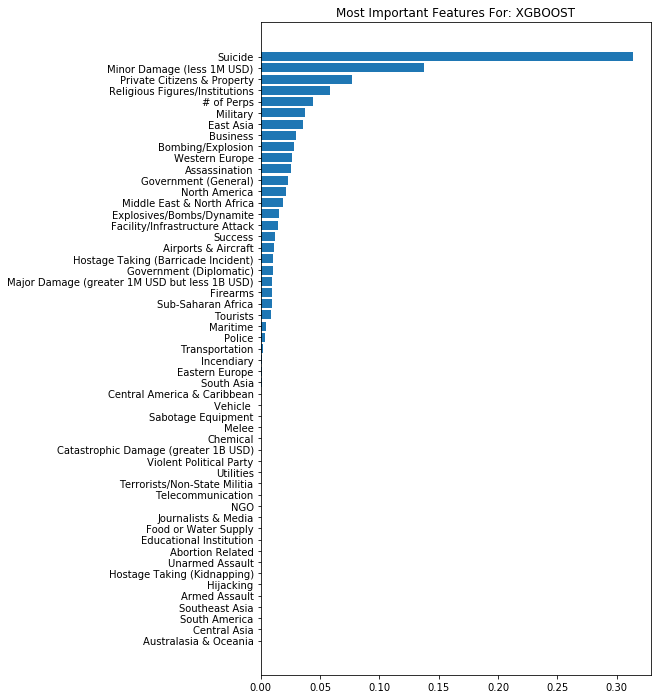

In [36]:
from matplotlib import pyplot as plt

def plotting_feature(feature_importances, class_name):    
    final = [x for x in zip(X_train, feature_importances)]
    final.sort(key = lambda final: final[1])
    plt.rcParams["figure.figsize"] = [7,12]
    plt.barh([x[0] for x in final], [x[1] for x in final])
    plt.title("Most Important Features For: " + str(class_name))
    plt.show()

xgboost_model = GradientBoostingRegressor(n_estimators=39, learning_rate=0.1, max_depth=3)
xgboost_model.fit(X_train, y_train)
plotting_feature(xgboost_model.feature_importances_, 'XGBOOST')

## Neural Network Model (not in report)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras import losses

model = Sequential()
model.add(Dense(53, input_shape=(53,), init='uniform', activation='sigmoid'))
model.add(Dense(53, init='uniform', activation='sigmoid'))
model.add(Dense(53, init='uniform', activation='sigmoid'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.summary()


tbCallBack = keras.callbacks.TensorBoard(log_dir='/tmp/keras_logs', write_graph=True)

# Compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=9, batch_size=10,  verbose=1, validation_split=0.3, callbacks=[tbCallBack])

# PREDICTION
ANN_m_prediction = model.predict(X_val)

# ERRRORS
mse = mean_squared_error(y_val, train_predictions)
rmse = sqrt(mse)
r2 = float(r2_score(y_val, train_predictions))
adjr2 = 1 - ((1-r2) * (len(X_val)-1) / (len(X_val) - len(X_val.columns)-1))
print("-------------------")
print("ERROR METRICS")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R^2: {}".format(r2))
print("Adj R^2: {}".format(adjr2))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(53, input_shape=(53,), activation="sigmoid", kernel_initializer="uniform")`

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(53, activation="sigmoid", kernel_initializer="uniform")`

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(53, activation="sigmoid", kernel_initializer="uniform")`

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 53)                2862      
_________________________________________________________________
dense_14 (Dense)             (None, 53)                2862      
_________________________________________________________________
dense_15 (Dense)             (None, 53)                2862      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 54        
Total params: 8,640
Trainable params: 8,640
Non-trainable params: 0
_________________________________________________________________
Train on 1986 samples, validate on 852 samples
Epoch 1/9
1986/1986 [==============================] - 0s 248us/step - loss: 1099.0764 - acc: 0.1203 - val_loss: 814.7846 - val_acc: 0.1326
Epoch 2/9
1986/1986 [==============================] - 0s 219us/step - loss: 1096.489